# 🛰️ Spaceship Titanic Classification Challenge (Kaggle)
This notebook aims to solve the Spaceship Titanic Kaggle challenge by:
- Performing data preprocessing and EDA
- Building and training multiple ML models
- Evaluating model performance using accuracy, precision, recall, F1-score, and confusion matrix
- Generating a submission file for Kaggle


# **1. Import Required Libraries**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


#  **2. Load the Dataset**
Load training and test datasets from the Kaggle Spaceship Titanic competition.


In [3]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
sample_submission = pd.read_csv("/content/sample_submission.csv")

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
train.head()


Train Shape: (8693, 14)
Test Shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## **Heatmap on missing value**

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


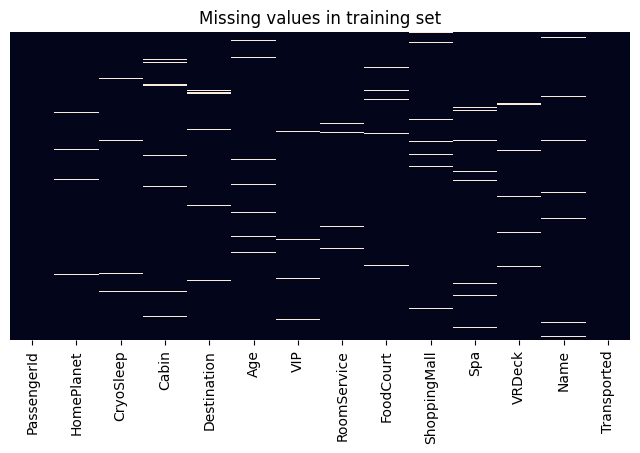

In [7]:
# 1) Missingness heatmap
plt.figure(figsize=(8,4))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False)
plt.title("Missing values in training set")
plt.show()

# **3. Data Preprocessing**
We will:
- Drop irrelevant columns (`Name`, `Cabin`)
- Handle missing values
- Encode categorical variables using one-hot encoding
- Convert the target variable `Transported` to binary


In [12]:
# Backup Passenger IDs for submission
test_ids = test["PassengerId"]

# Drop columns not useful for modeling
train = train.drop(["Name", "Cabin", "PassengerId"], axis=1)
test = test.drop(["Name", "Cabin", "PassengerId"], axis=1)

# Fill missing values
for col in train.columns:
    if train[col].dtype == "object":
        train[col] = train[col].fillna(train[col].mode()[0])
    else:
        train[col] = train[col].fillna(train[col].median())

for col in test.columns:
    if col != 'Transported': # Exclude the target variable which is not in the test set
        if test[col].dtype == "object":
            test[col] = test[col].fillna(test[col].mode()[0])
        else:
            test[col] = test[col].fillna(test[col].median())

# Infer object types to remove downcasting warnings
train = train.infer_objects(copy=False)
test = test.infer_objects(copy=False)

# Encode target
train["Transported"] = train["Transported"].astype(bool).astype(int)

# One-hot encoding
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Align train and test sets
X = train.drop("Transported", axis=1)
y = train["Transported"]
X, test = X.align(test, join="left", axis=1, fill_value=0)

/tmp/ipython-input-12-3117666892.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train[col].fillna(train[col].mode()[0])
/tmp/ipython-input-12-3117666892.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[col] = test[col].fillna(test[col].mode()[0])


In [13]:
print('After preprocessing:')

train.info()

After preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   HomePlanet_Europa          8693 non-null   bool   
 10  HomePlanet_Mars            8693 non-null   bool   
 11  Destination_PSO J318.5-22  8693 non-null   bool   
 12  Destination_TRAPPIST-1e    8693 non-null   bool   
dtypes: bool(6), float64(6), int

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   bool   
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   bool   
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   HomePlanet_Europa          4277 non-null   bool   
 9   HomePlanet_Mars            4277 non-null   bool   
 10  Destination_PSO J318.5-22  4277 non-null   bool   
 11  Destination_TRAPPIST-1e    4277 non-null   bool   
dtypes: bool(6), float64(6)
memory usage: 225.7 KB


# **4. Exploratory Data Analysis (EDA)**
We will visualize:
- Class balance of target
- Age distribution
- Relationships between categorical features and the target


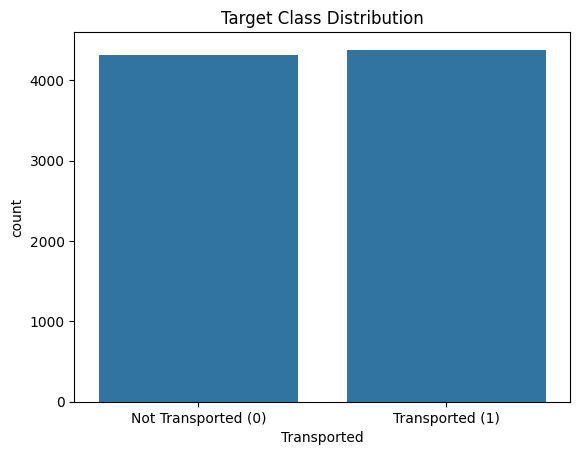

In [ ]:
# Transported distribution
sns.countplot(x="Transported", data=train)
plt.title("Target Class Distribution")
plt.xticks([0, 1], ["Not Transported (0)", "Transported (1)"]) # Add labels for clarity
plt.show()

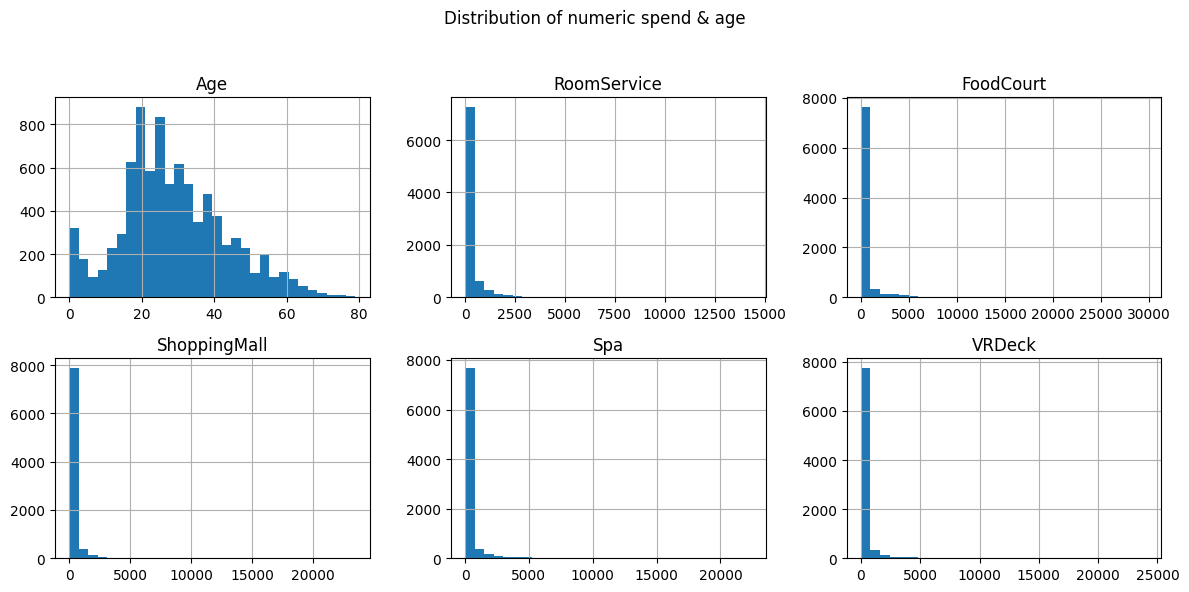

In [9]:

# 2) Numeric distributions
num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train[num_cols].hist(bins=30, figsize=(12,6), layout=(2,3))
plt.suptitle("Distribution of numeric spend & age")
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()



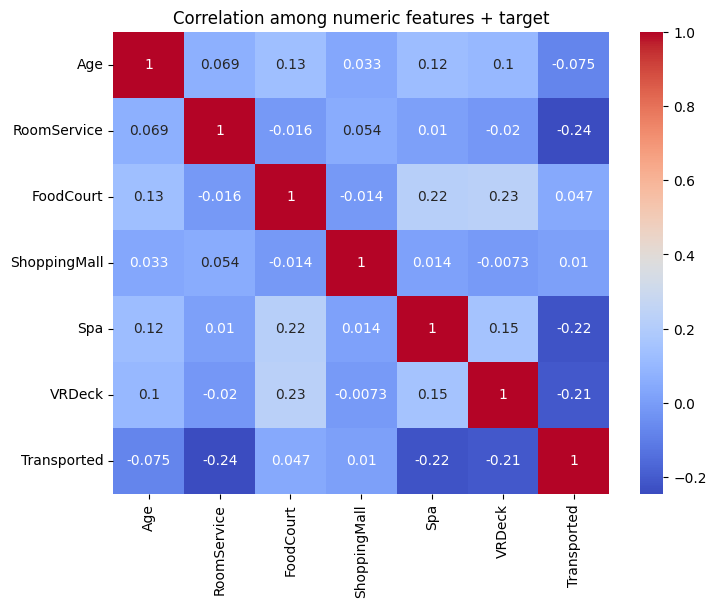

In [10]:
# 3) Correlation matrix
plt.figure(figsize=(8,6))
corr = train[num_cols + ['Transported']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation among numeric features + target")
plt.show()

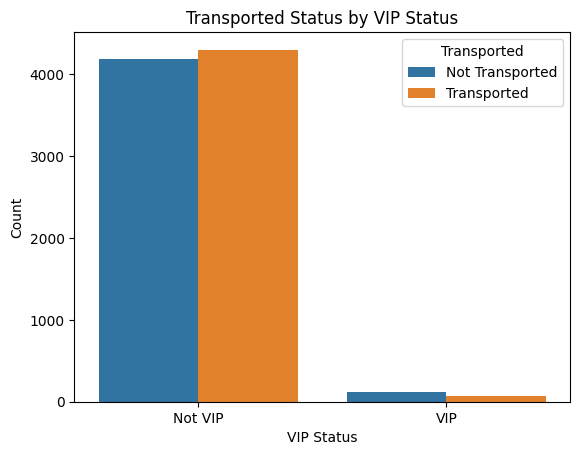

In [ ]:

sns.countplot(x="VIP", hue="Transported", data=train)
plt.title("Transported Status by VIP Status")
plt.xlabel("VIP Status")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not VIP", "VIP"]) # Label the x-axis ticks
plt.legend(title="Transported", labels=["Not Transported", "Transported"]) # Add meaningful labels to the legend
plt.show()

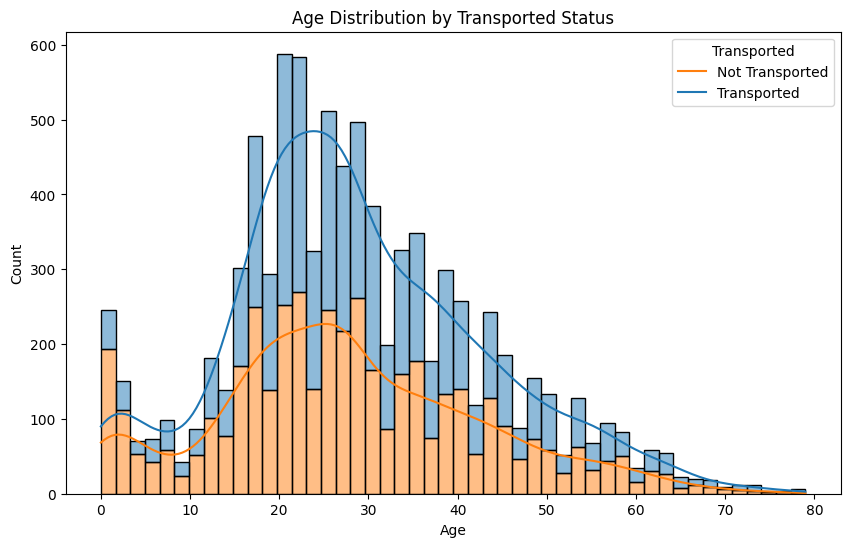

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Transported', multiple='stack', kde=True, common_norm=False)
plt.title('Age Distribution by Transported Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Transported', labels=['Not Transported', 'Transported']) # Add meaningful labels to the legend
plt.show()


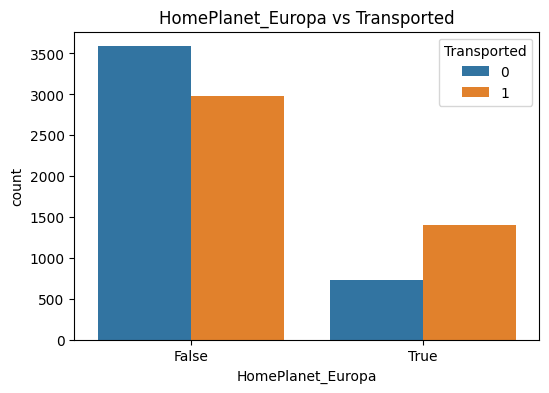

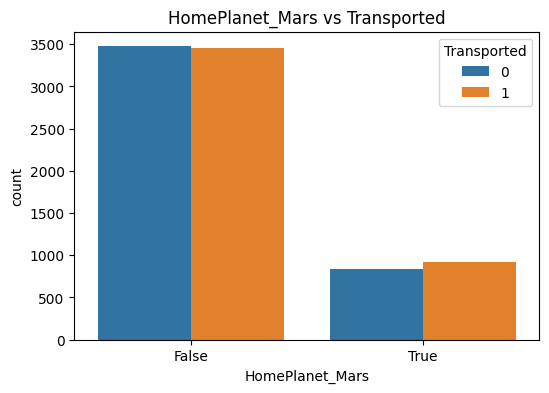

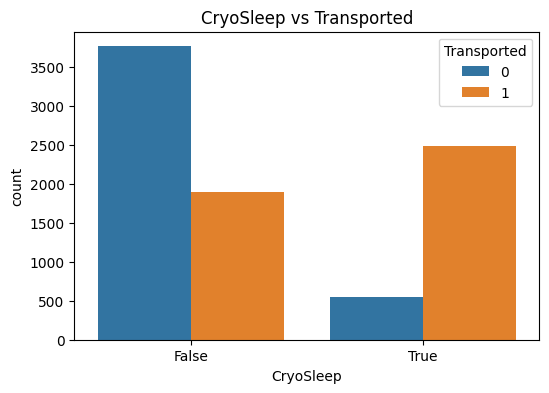

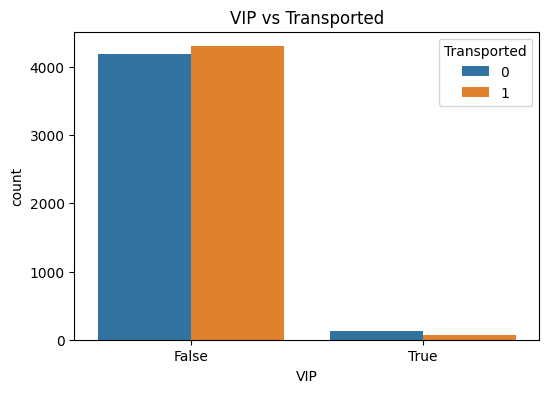

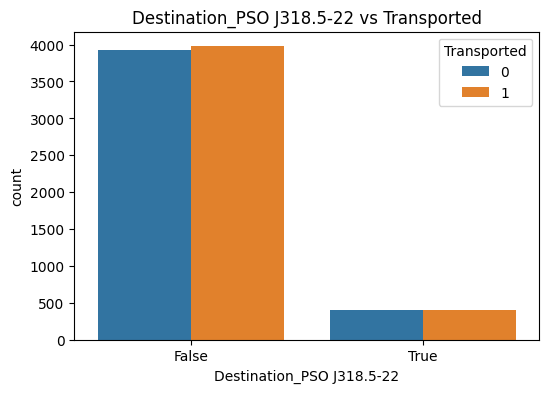

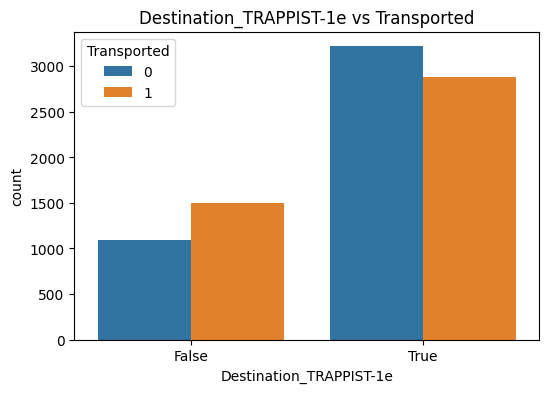

In [ ]:
# Explore categorical columns
categorical_cols = ["HomePlanet_Europa", "HomePlanet_Mars", "CryoSleep", "VIP", "Destination_PSO J318.5-22", "Destination_TRAPPIST-1e"]
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=train[col], hue=y)
    plt.title(f"{col} vs Transported")
    plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
spend_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
X[spend_cols] = scaler.fit_transform(X[spend_cols])
test[spend_cols] = scaler.transform(test[spend_cols])


# **5. Split the Dataset**
We will use 80% of the data for training and 20% for validation.


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# **6. Train Multiple ML Models**
We will train:
- Logistic Regression
- Random Forest
- XGBoost Classifier


# **5. Logistic Regression**
# Why use Logistic Regression?
It is a simple and interpretable linear model used for binary classification. It gives a good performance baseline and shows how linearly separable the data is.


In [ ]:

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_val)

print(" Logistic Regression Results:")
print("Accuracy :", accuracy_score(y_val, lr_preds))
print("Precision:", precision_score(y_val, lr_preds))
print("Recall   :", recall_score(y_val, lr_preds))
print("F1 Score :", f1_score(y_val, lr_preds))
print(classification_report(y_val, lr_preds))


🔎 Logistic Regression Results:
Accuracy : 0.7768832662449684
Precision: 0.7634408602150538
Recall   : 0.8086560364464692
F1 Score : 0.7853982300884956
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       861
           1       0.76      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


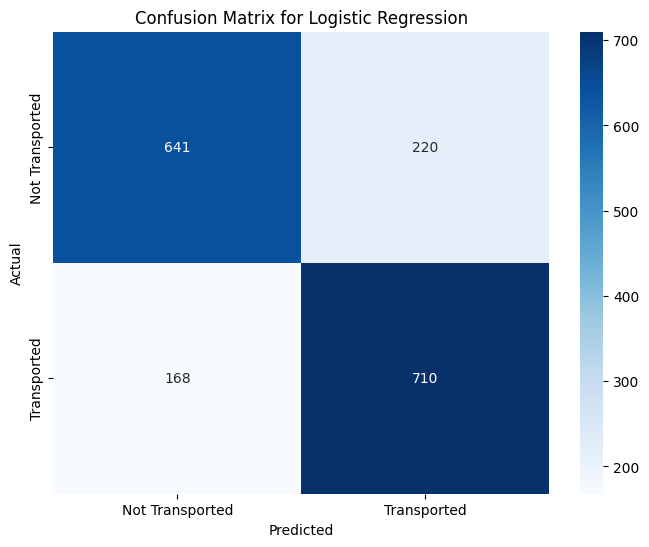

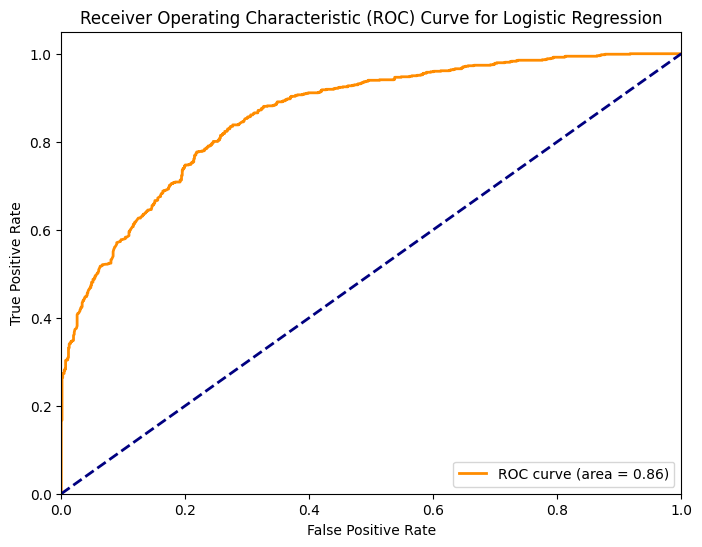

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot Confusion Matrix
cm = confusion_matrix(y_val, lr_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
lr_probs = lr_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, lr_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# **6. Random Forest**
# Why use Random Forest?
 It's an ensemble method that combines multiple decision trees to improve prediction accuracy and reduce overfitting. It can capture non-linear relationships and feature interactions.



Random Forest Results:
Accuracy : 0.7883841288096607
Precision: 0.7771739130434783
Recall   : 0.8143507972665148
F1 Score : 0.7953281423804227
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       861
           1       0.78      0.81      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



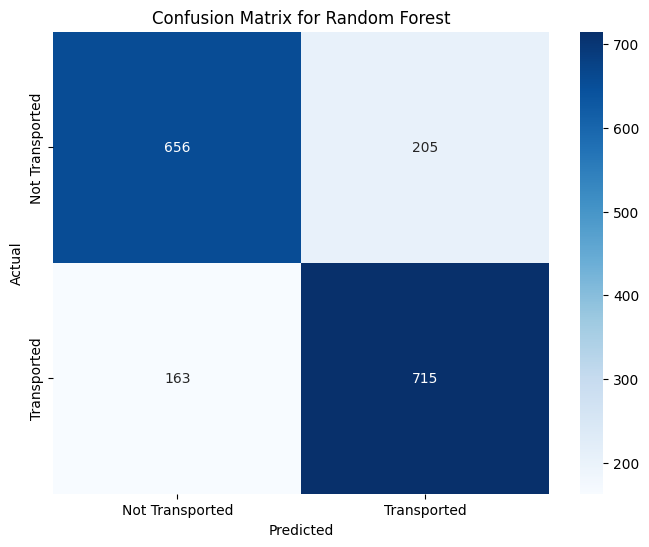

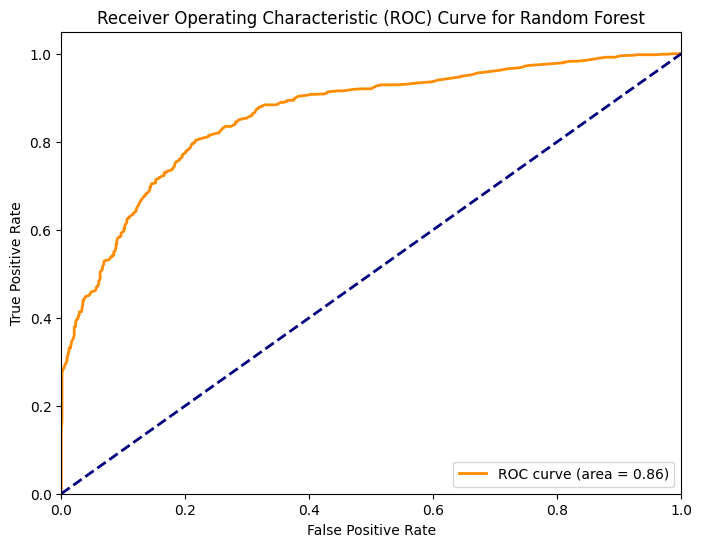

In [ ]:

rf_model = RandomForestClassifier(random_state=42,max_samples=200,n_estimators=200)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

print("Random Forest Results:")
print("Accuracy :", accuracy_score(y_val, rf_preds))
print("Precision:", precision_score(y_val, rf_preds))
print("Recall   :", recall_score(y_val, rf_preds))
print("F1 Score :", f1_score(y_val, rf_preds))
print(classification_report(y_val, rf_preds))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, rf_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
rf_probs = rf_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()



# **XGBoost Classifier**
# Why use XGBoost?
 It's a powerful gradient boosting library that is highly efficient and flexible. It often achieves state-of-the-art results on tabular data and handles missing values and complex relationships well.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:28:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost Classifier Results:
Accuracy : 0.7809085681426107
Precision: 0.7652081109925294
Recall   : 0.816628701594533
F1 Score : 0.7900826446280992
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       861
           1       0.77      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



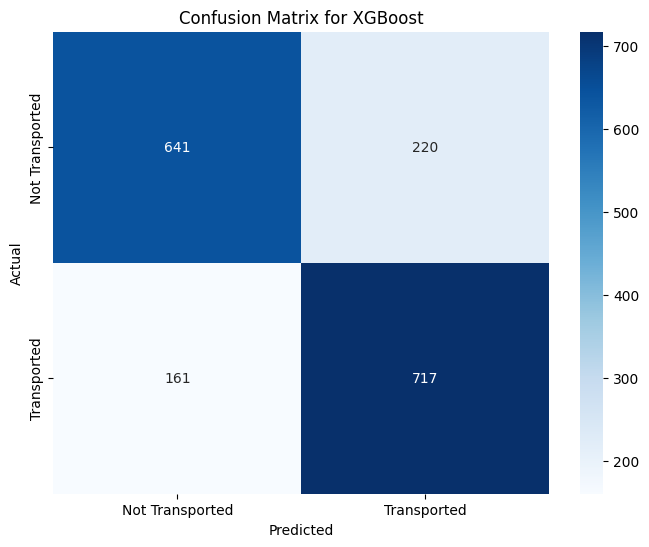

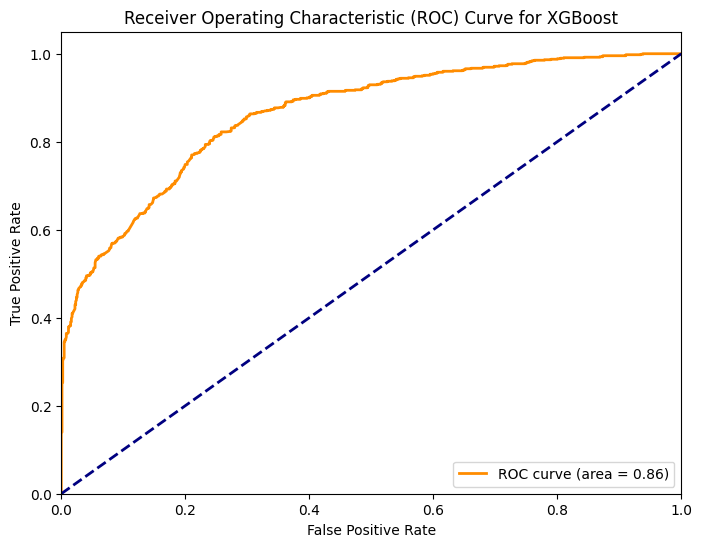

In [ ]:

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)

print(" XGBoost Classifier Results:")
print("Accuracy :", accuracy_score(y_val, xgb_preds))
print("Precision:", precision_score(y_val, xgb_preds))
print("Recall   :", recall_score(y_val, xgb_preds))
print("F1 Score :", f1_score(y_val, xgb_preds))
print(classification_report(y_val, xgb_preds))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, xgb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
xgb_probs = xgb_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, xgb_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()


Naive Bayes Results:
Accuracy : 0.7015526164462335
Precision: 0.6441767068273092
Recall   : 0.9134396355353075
F1 Score : 0.7555346208195949
              precision    recall  f1-score   support

           0       0.85      0.49      0.62       861
           1       0.64      0.91      0.76       878

    accuracy                           0.70      1739
   macro avg       0.75      0.70      0.69      1739
weighted avg       0.74      0.70      0.69      1739



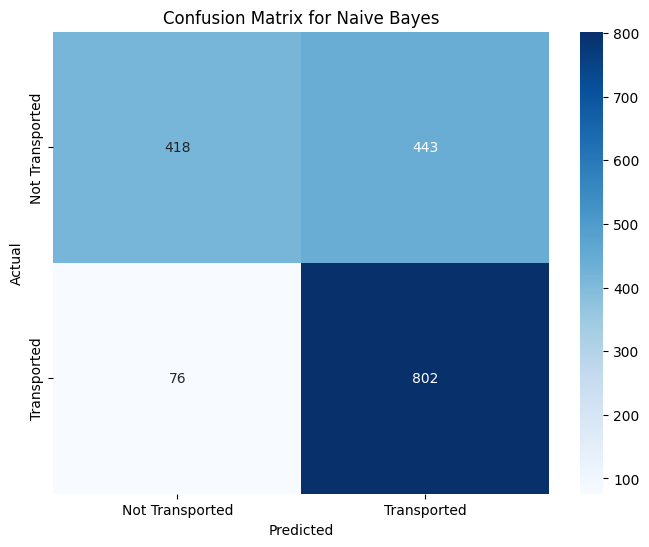

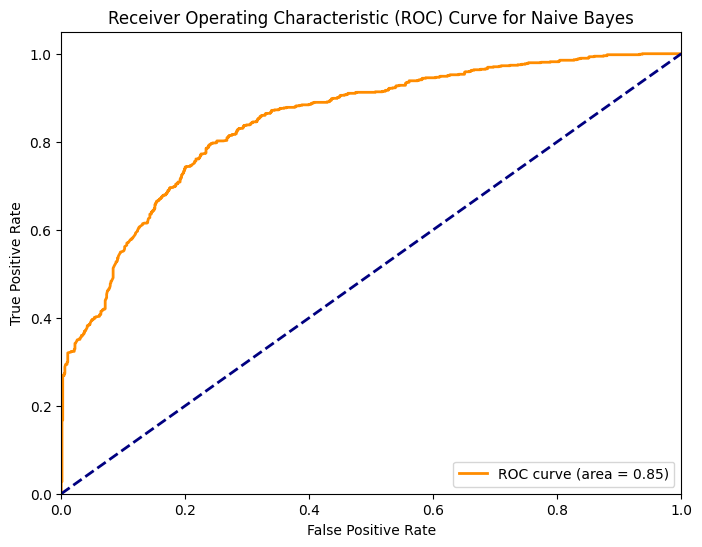

In [ ]:

import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_val)

print("Naive Bayes Results:")
print("Accuracy :", accuracy_score(y_val, nb_preds))
print("Precision:", precision_score(y_val, nb_preds))
print("Recall   :", recall_score(y_val, nb_preds))
print("F1 Score :", f1_score(y_val, nb_preds))
print(classification_report(y_val, nb_preds))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, nb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
nb_probs = nb_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, nb_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# **KNN**
# Why use KNN?
 KNN is a non-parametric, instance-based learning algorithm. It classifies data points based on the majority class of their k nearest neighbors in the feature space. For this dataset, KNN can be useful because it makes no assumptions about the underlying data distribution and can capture complex decision boundaries. It's relatively simple to understand and implement.


# **7. K-Nearest Neighbors (KNN)**
🔍 KNN Results:
Accuracy : 0.7625071880391029
Precision: 0.7540983606557377
Recall   : 0.785876993166287
F1 Score : 0.769659788064696
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       861
           1       0.75      0.79      0.77       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



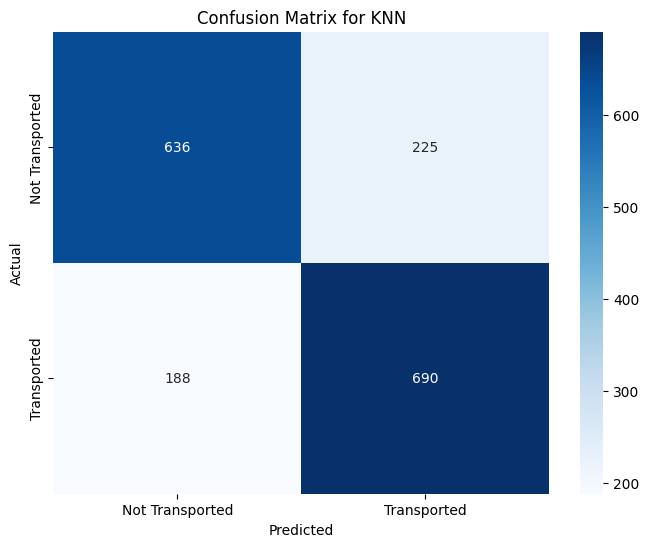

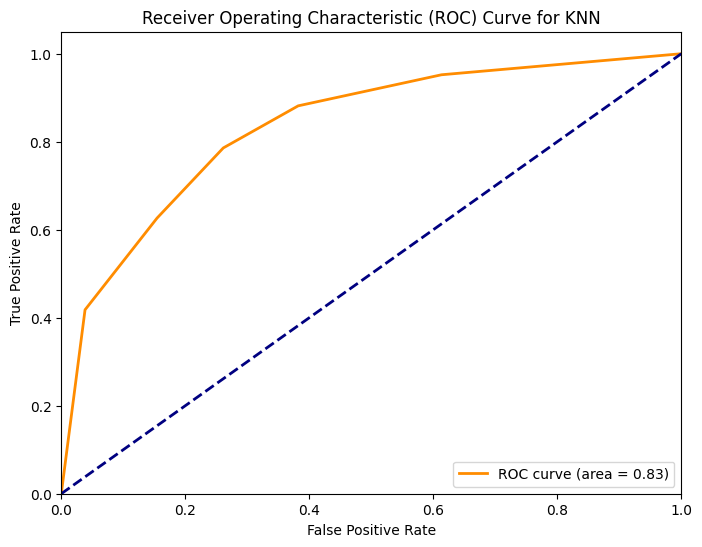

In [ ]:
# prompt: apply KNN model and also write why we use for this data

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

print("#  K-Nearest Neighbors (KNN)")

knn_model = KNeighborsClassifier(n_neighbors=5) # You can tune n_neighbors
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_val)

print(" KNN Results:")
print("Accuracy :", accuracy_score(y_val, knn_preds))
print("Precision:", precision_score(y_val, knn_preds))
print("Recall   :", recall_score(y_val, knn_preds))
print("F1 Score :", f1_score(y_val, knn_preds))
print(classification_report(y_val, knn_preds))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, knn_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
knn_probs = knn_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, knn_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()



In [ ]:
%pip install shap

# **Explainable Ai Methods**


In [ ]:
%pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=de4b197d740d6de4acc64b5f79411509c8b14854e30164615b6638cc297d45de
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

#  **Global Feature Importances (Gini)**
Random Forest gives built‑in *Gini importances* that tell us which features the model splits on most.


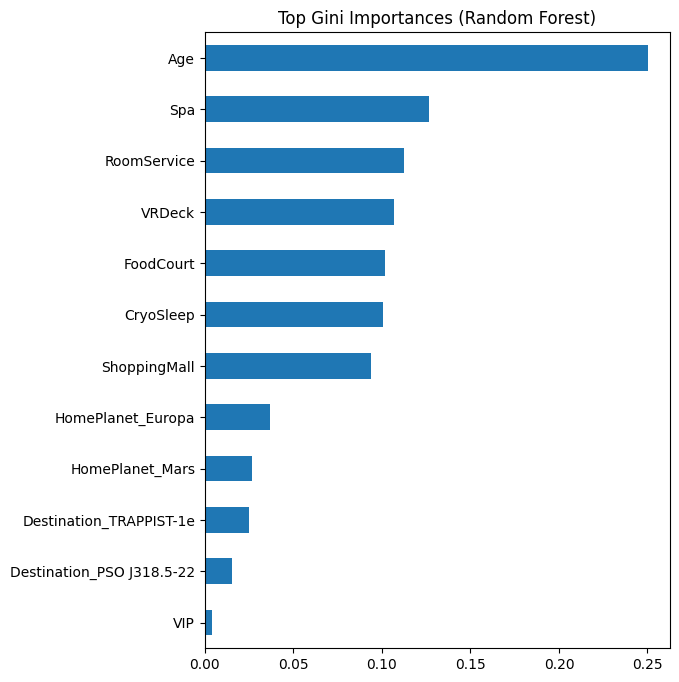

In [ ]:
#  Built‑in feature importances
importances = pd.Series(rf_model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(6,8))
importances.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top Gini Importances (Random Forest)")
plt.show()


# **Permutation Importance (Model‑Agnostic)**
We **randomly shuffle** each column and measure the drop in validation accuracy.  
This is often more reliable than Gini because it evaluates the trained model, not just its splits.


,0
CryoSleep,0.056699
VRDeck,0.035193
RoomService,0.029902
Spa,0.029289
FoodCourt,0.025187
Age,0.009086
ShoppingMall,0.008434
HomePlanet_Europa,0.004945
HomePlanet_Mars,0.003220
Destination_TRAPPIST-1e,0.003067


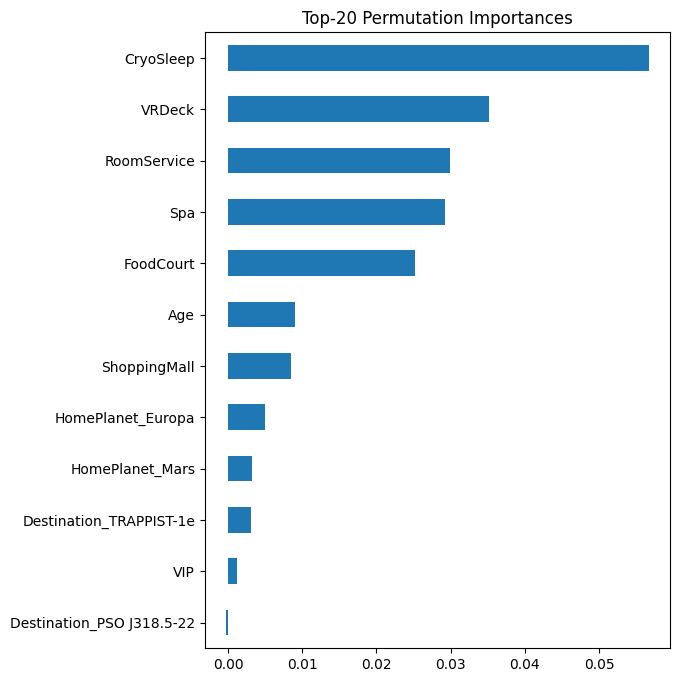

In [ ]:
# Permutation importance
perm = permutation_importance(rf_model, X_val, y_val,
                              n_repeats=15, random_state=42, n_jobs=-1)

perm_df = pd.Series(perm.importances_mean, index=X_val.columns) \
            .sort_values(ascending=False)
display(perm_df.head(10))

plt.figure(figsize=(6,8))
perm_df.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top Permutation Importances")
plt.show()


#  **SHAP (SHapley Additive Explanations)**
`shap.TreeExplainer` computes per‑sample contribution values that **sum to the model’s output**.  
We’ll draw (a) a summary plot for **global** effects and (b) a force plot for **one** prediction.


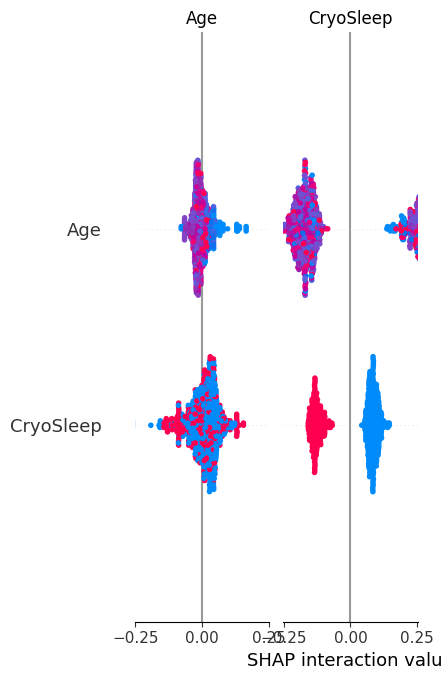

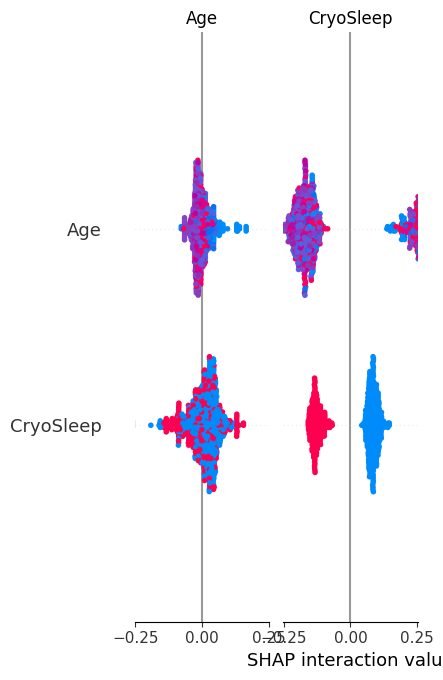

In [ ]:
#  SHAP explanation
explainer = shap.TreeExplainer(rf_model)
# For speed, sample 1 000 rows (adjust as needed)
sample_idx = np.random.choice(X_train.index, size=1000, replace=False)
shap_values = explainer.shap_values(X_train.loc[sample_idx])

# (a) Summary plot (class‑average)
shap.summary_plot(shap_values, X_train.loc[sample_idx],
                  plot_type="bar")        # global bar
shap.summary_plot(shap_values, X_train.loc[sample_idx])  # beeswarm


In [ ]:
# LIME explanation for a single row
feature_names = list(X_train.columns)
class_names   = [str(c) for c in rf_model.classes_]

lime_exp = LimeTabularExplainer(training_data=X_train.values,
                                feature_names=feature_names,
                                class_names=class_names,
                                mode='classification',
                                discretize_continuous=True)

row_id = 3   # pick any sample from validation set
exp = lime_exp.explain_instance(X_val.iloc[row_id].values,
                                rf_model.predict_proba,
                                num_features=10)

exp.show_in_notebook()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#  **Build Submission File**
This section:
1. Loads the public test set (`X_test`).
2. Generates predictions with the trained Random Forest.
3. Reads the provided `sample_submission.csv`.
4. Inserts predictions into the correct column.
5. Writes out `submission.csv` ready for upload.


In [ ]:
# Predict with the trained Random Forest
test_preds = rf_model.predict(test)        # returns class labels


# **7. Create Submission File**

Now we will create the submission file in the format required by Kaggle. This involves:
1. Using the `test_ids` we saved earlier.
2. Using the `test_preds` generated by the chosen model (Random Forest in this case).
3. Creating a DataFrame with 'PassengerId' and 'Transported' columns.
4. Saving the DataFrame to a CSV file.

In [ ]:
# Create the submission DataFrame
submission_df = pd.DataFrame({'PassengerId': test_ids, 'Transported': test_preds})

# Convert predictions back to boolean as required by the submission format
submission_df['Transported'] = submission_df['Transported'].astype(bool)

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully: submission.csv")

Submission file created successfully: submission.csv
